In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('pastel')
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Salary Data.csv")

In [3]:
data.shape

(30, 2)

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

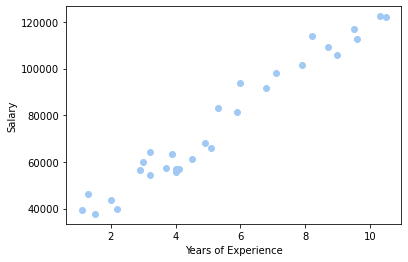

In [8]:
plt.scatter(x=data['YearsExperience'],y=data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [9]:
correlation=data.corr()
correlation

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

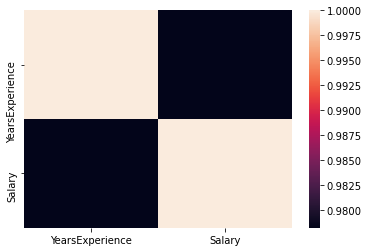

In [10]:
sns.heatmap(correlation)

In [11]:
X=data.iloc[:,:-1].values

In [12]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [13]:
Y=data.iloc[:,-1].values

In [14]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

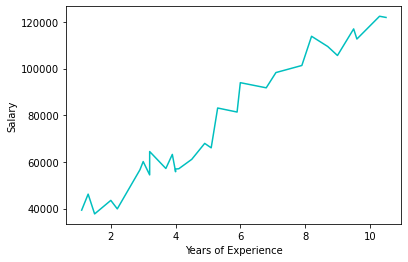

In [15]:
plt.plot(X,Y,'c')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()         

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
x=data[["YearsExperience"]]
y=data["Salary"]
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

In [18]:
x_train.shape

(20, 1)

In [19]:
x_test.shape

(10, 1)

In [20]:
model=LinearRegression()

In [21]:
# Fitting the model to the training data

In [22]:
model.fit(x_train,y_train)

LinearRegression()

In [23]:
# Make predictions on the test data

In [24]:
y_pred=model.predict(x_test)

In [25]:
print('R Squared', metrics.r2_score(y_test,y_pred))

R Squared 0.9749154407708353


In [26]:
print('Mean Squared Error=', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error= 21026037.329511296


In [27]:
print('Mean Absolute Error=', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error= 3426.4269374307078


In [28]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error=', rmse)

Root Mean Squared Error= 4585.4157204675885


In [29]:
data1_x_test=pd.DataFrame(x_test)
data1_y_test=pd.DataFrame(y_test)
data1_y_pred=pd.DataFrame(y_pred)
data1_diff=data1_y_test-data1_y_pred
y_test_pred=pd.concat([data1_x_test,data1_y_test,data1_y_pred],axis=1)
y_test_pred['Difference']=data1_diff

In [30]:
y_test_pred

,0,0,0,Difference
0,1.5,37731,40835.105909,-3104.105909
1,10.3,122391,123079.399408,-688.399408
2,4.1,57081,65134.556261,-8053.556261
3,3.9,63218,63265.367772,-47.367772
4,9.5,116969,115602.645454,1366.354546
5,8.7,109431,108125.891499,1305.108501
6,9.6,112635,116537.239698,-3902.239698
7,4.0,55794,64199.962017,-8405.962017
8,5.3,83088,76349.687193,6738.312807
9,7.9,101302,100649.137545,652.862455


In [31]:
data1_x_test=pd.DataFrame(x_test,columns=['Experience'])
data1_y_test=pd.DataFrame(y_test,columns=['Salary'])
data1_y_pred=pd.DataFrame(y_pred,columns=['Predictions'])
data1_diff=data1_y_test-data1_y_pred
y_test_pred=pd.concat([data1_x_test,data1_y_test,data1_y_pred],axis=1)
y_test_pred['Difference']=y_test_pred["Salary"]-y_test_pred["Predictions"]

In [32]:
y_test_pred

,Experience,Salary,Predictions,Difference
0,1.5,37731,40835.105909,-3104.105909
1,10.3,122391,123079.399408,-688.399408
2,4.1,57081,65134.556261,-8053.556261
3,3.9,63218,63265.367772,-47.367772
4,9.5,116969,115602.645454,1366.354546
5,8.7,109431,108125.891499,1305.108501
6,9.6,112635,116537.239698,-3902.239698
7,4.0,55794,64199.962017,-8405.962017
8,5.3,83088,76349.687193,6738.312807
9,7.9,101302,100649.137545,652.862455


In [33]:
y_pred_final=pd.DataFrame(data1_y_pred,columns=["Prediction"])
y_pred_final

,Prediction
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [34]:
result=pd.concat([data,y_pred_final],axis=1)
result

,YearsExperience,Salary,Prediction
0,1.1,39343,NaN
1,1.3,46205,NaN
2,1.5,37731,NaN
3,2.0,43525,NaN
4,2.2,39891,NaN
5,2.9,56642,NaN
6,3.0,60150,NaN
7,3.2,54445,NaN
8,3.2,64445,NaN
9,3.7,57189,NaN


In [35]:
model.predict([[16]])

array([176351.27133399])